In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

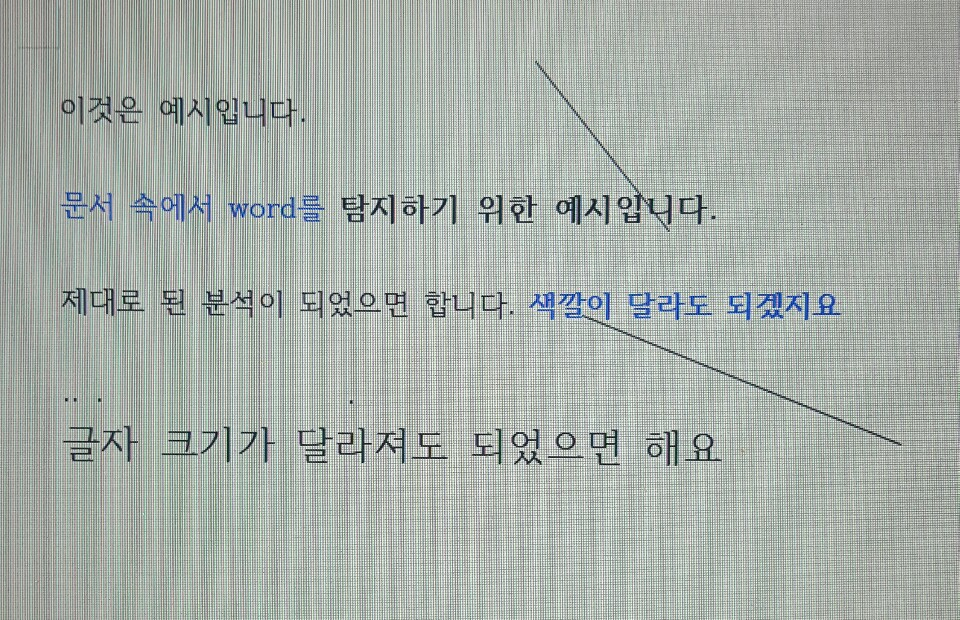

In [24]:
img_path="/usr/bin/detect_text.jpg"
img=cv2.imread(img_path, flags=1)
cv2_imshow(img)

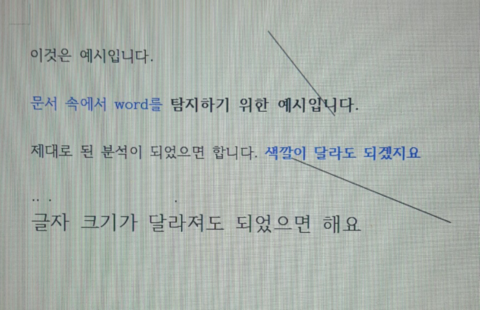

In [25]:
small = cv2.pyrDown(img)
#행과 열 두배씩 scale down
cv2_imshow(small)

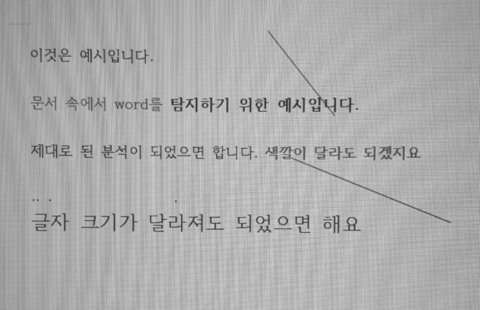

In [26]:
gray = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)
#grayscale
cv2_imshow(gray)

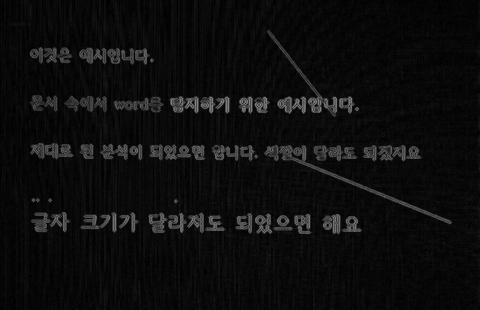

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(grad)

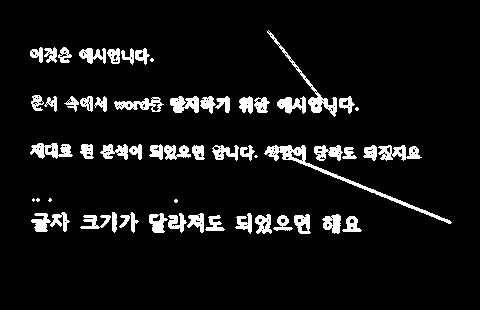

In [28]:
_, bw = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(bw)

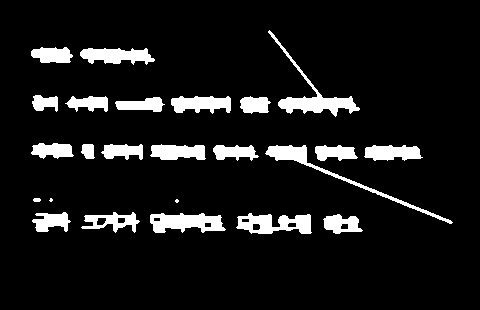

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 3))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
cv2_imshow(connected)

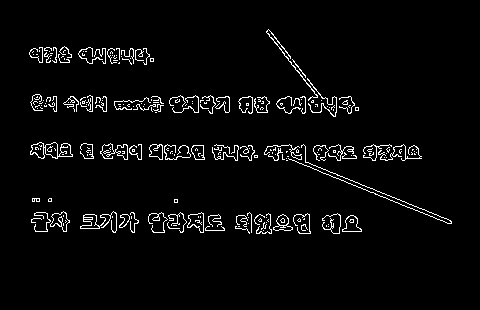

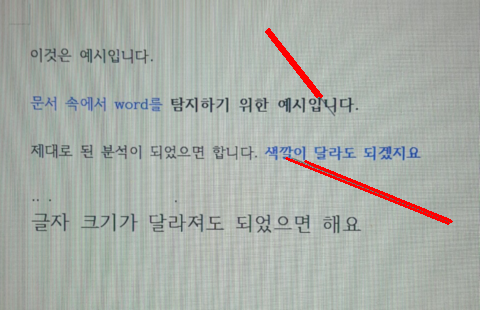

In [30]:
edges=cv2.Canny(bw, 50, 200)
cv2_imshow(edges)
lines=cv2.HoughLinesP(edges, 1, np.pi/180, 50, None, 30, 2)
for line in lines:
  x1, y1, x2, y2=line[0]
  cv2.line(small, (x1,y1), (x2,y2), (0, 0, 255), 2)
cv2_imshow(small)

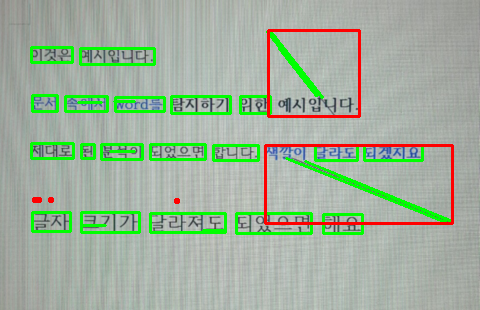

In [9]:
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask = np.zeros(bw.shape, dtype=np.uint8)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    if r > 0.45 and w > 8 and h > 8:
      cv2.rectangle(small, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2) #green
    else:
      cv2.rectangle(small, (x, y), (x+w-1, y+h-1), (0, 0, 255), 2) #red
# show image with contours rect
cv2_imshow(small)